# Perceptron

- a single **unit of logic** in artificial neural network.
- an **algorithm** which outputs a **binary conclusion** 0 or 1
- a **single node** in a bigger network, meant to mimic a neuron inside a human **brain**

In [1]:
# input features and weight for each feature
features = [0.1, 0.5, 0.2]
weights  = [0.4, 0.3, 0.6]

# bias
threshold = 0.5

# Activation Function
def step_function(weighted_sum):
    return 1 if weighted_sum > threshold else 0

# More Weight, More Significant
def perceptron():
    weighted_sum = 0
    for x, w in zip(features, weights):
        weighted_sum += x * w
        print(f"weighted sum = {weighted_sum:.2f}")
    return step_function(weighted_sum)

output = perceptron()
print(f"\n{'-' * 15}\noutput: {output}")

weighted sum = 0.04
weighted sum = 0.19
weighted sum = 0.31

---------------
output: 0


# Cross Entropy

- desired output (target)    $:{y}$
- actual output (prediction) $:\hat{y}$

**Error Function** is also called **Loss Function** or **Cost**, calculate the distance between given point and the target  

**Cross Entrophy Loss** is also known as **Log Loss**  

- Single Data Entry's formula:
$$loss = {-(y \times log(w_{sum}) + (1 - y) \times log(1 - w_{sum}))}$$

- All Data Entry's formula:
$$\dfrac{loss[1] + loss[2] + ... + loss[n]}{n}$$
$$\dfrac{\sum\limits_{i=0}^{n}{-(y_i \times log(w_{sum_i}) + (1 - y_i) \times log(1 - w_{sum_i}))}}{n}$$

- where y = target, i = entry index, n = total number of data entries

In [2]:
from math import log10

# consist of w_sum and target
input_data = [
    (0.26, 1),
    (0.20, 0),
    (0.48, 1),
    (0.30, 0)
]

# For single data entry
def loss_function(w, y):
    return -(y * log10(w) + (1 - y) * log10(1 - w))

# For all data entries
def cross_entropy(data_entry):
    loss = 0
    for entry in data_entry:
        loss += loss_function(*entry)
        print(f"loss = {loss:.2f}")
    return loss / len(data_entry)

error_term = cross_entropy(input_data)
print(f"\n{'-' * 15}\nerror: {error_term:.3f}")

loss = 0.59
loss = 0.68
loss = 1.00
loss = 1.16

---------------
error: 0.289


# Gradient Descent

- updating the **weights** of AI models
- minimizing the **training loss**
- decimal prediction between 0 and 1

**learning rate ($\alpha$)** ensure a gradual weight update with no drastic changes  


**update weight and bias**
- $w'_{i} = w_{i} + \alpha \cdot (y - \hat{y}) \cdot x_{i}$
- $b'_{i} = b_{i} + \alpha \cdot (y - \hat{y})$

**epoch** is a **single iteration** over the dataset of features  


In [3]:
import numpy as np

# Activation Function
def sigmoid(w_sum):
    return 1 / (1 + np.exp(-w_sum))

# Get Model Prediction
def get_prediction(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Loss Function
def cross_entropy(target, prediction):
    return - (target  * np.log10(prediction) 
           + (1 - target) * np.log10(1 - prediction))

# Update Weight and Bias
def gradient_descent(features, weights, target, prediction, learn_rate, bias):
    new_weights = []
    bias += learn_rate * (target - prediction)
    for x, w in zip(features, weights):
        new_w = w + learn_rate * (target - prediction) * x
        new_weights.append(new_w)
    return new_weights, bias

# Data
bias   = 0.5
l_rate = 0.1
epochs = 5

features = np.array([
    [0.1, 0.5, 0.2, 0.3],
    [0.2, 0.3, 0.1, 0.5],
    [0.7, 0.4, 0.2, 0.1],
    [0.1, 0.4, 0.3, 0.4]
])
weights = np.array([0.4, 0.2, 0.6, 0.1])
predict = np.array([0.3, 0.4, 0.5, 0.6])
targets = np.array([0, 1, 0, 1])

for i in range(epochs):
    weight, bias = gradient_descent(features, weights, targets, predict, l_rate, bias)
    prediction = get_prediction(features, weight, bias)
    loss = cross_entropy(targets, prediction)
    print(f" epoch {i} ".center(20, '='))
    print(f"Average Loss: {np.sum(loss) / loss.size:.5f}\n")

===== epoch 0 ======
Average Loss: 0.32670

===== epoch 1 ======
Average Loss: 0.31772

===== epoch 2 ======
Average Loss: 0.30894

===== epoch 3 ======
Average Loss: 0.30035

===== epoch 4 ======
Average Loss: 0.29194



# Neural Network

In [1]:
import numpy as np
import pandas as pd

bias   = 0.5
l_rate = 0.1
epochs = 5

epoch_loss = []

# random generator
rg = np.random.default_rng()


def generate_data(n_feature, n_value):
    feature = rg.random((n_feature, n_value))
    weights = rg.random((1, n_value))[0]

    targets = np.random.choice([0, 1], n_feature)
    feature = np.round(feature, decimals=3)

    data = pd.DataFrame(feature, columns=["x0", "x1", "x2"])
    data["target"] = targets
    return data, weights


def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias


# Activation Function
def sigmoid(w_sum):
    return 1 / (1 + np.exp(-w_sum))


# Log Loss Function
def cross_entropy(target, prediction):
    return - (target  * np.log10(prediction) 
           + (1 - target) * np.log10(1 - prediction))


# Gradient Descent
def update_weights(weights, learn_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + learn_rate * (target - prediction) * x
        new_weights.append(new_w)
    return new_weights


# Gradient Descent
def update_bias(bias, learn_rate, target, prediction):
    return bias + learn_rate * (target - prediction)


# main model traning function with debugger
def train_model_with_debug(data, weights, bias, learn_rate, epochs):
    for gen in range(epochs):
        print(f"\n" + f" Epoch {gen} ".center(30, '='))

        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target  = data.loc[i][-1]

            # perceptron and cross entropy
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            print(f"\n" + f" data {i + 1} ".center(30, '-'))
            print(f"Predict: {prediction:.3f}\nLoss: {loss:.3f}")

            # gradient descent
            print("\nOld Values:")
            print(f"weight: {np.round(weights, decimals=3)}")
            print(f"bias: {bias:.3f}")

            weights = update_weights(weights, learn_rate, target, prediction, feature)
            bias = update_bias(bias, learn_rate, target, prediction)
            print("\nNew Values:")
            print(f"weight: {np.round(weights, decimals=3)}")
            print(f"bias: {bias:.3f}")
        
        average_loss = sum(individual_loss) / len(individual_loss)
        epoch_loss.append(average_loss)
        print(f"\nAverage Loss: {average_loss:.3f}")


# main model traning function
def train_model(data, weights, bias, learn_rate, epochs):
    epoch_loss = []

    for _ in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target  = data.loc[i][-1]

            # perceptron and cross entropy
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)

            # gradient descent
            weights = update_weights(weights, learn_rate, target, prediction, feature)
            bias = update_bias(bias, learn_rate, target, prediction)
        
        average_loss = sum(individual_loss) / len(individual_loss)
        epoch_loss.append(average_loss)

    # plot average loss
    df = pd.DataFrame(epoch_loss)
    df.plot(kind="line", grid=True).get_figure()

## Generate Dataset

In [2]:
data, weights = generate_data(50, 3)
data.head()

,x0,x1,x2,target
0,0.156,0.074,0.167,0
1,0.773,0.471,0.178,1
2,0.359,0.809,0.533,1
3,0.445,0.240,0.580,1
4,0.688,0.677,0.547,1


## Train Model

In [2]:
data_debug, weights_debug = generate_data(5, 3)

train_model_with_debug(data_debug, weights_debug, bias, l_rate, epochs)


========== Epoch 0 ===========

----------- data 1 -----------
Predict: 0.830
Loss: 0.770

Old Values:
weight: [0.874 0.07  0.742]
bias: 0.500

New Values:
weight: [0.792 0.021 0.72 ]
bias: 0.417

----------- data 2 -----------
Predict: 0.706
Loss: 0.151

Old Values:
weight: [0.792 0.021 0.72 ]
bias: 0.417

New Values:
weight: [0.796 0.046 0.734]
bias: 0.446

----------- data 3 -----------
Predict: 0.775
Loss: 0.111

Old Values:
weight: [0.796 0.046 0.734]
bias: 0.446

New Values:
weight: [0.798 0.047 0.756]
bias: 0.469

----------- data 4 -----------
Predict: 0.688
Loss: 0.505

Old Values:
weight: [0.798 0.047 0.756]
bias: 0.469

New Values:
weight: [0.786 0.02  0.741]
bias: 0.400

----------- data 5 -----------
Predict: 0.803
Loss: 0.095

Old Values:
weight: [0.786 0.02  0.741]
bias: 0.400

New Values:
weight: [0.804 0.039 0.748]
bias: 0.420

Average Loss: 0.327

========== Epoch 1 ===========

----------- data 1 -----------
Predict: 0.806
Loss: 0.712

Old Values:
weight: [0.804 0.0

## Analyze Training Data

- 1. first sunstantial decrease means **learning rate** should be lower
- 2. Average Loss has the potential tp keep decreasing means **epoch** should be higher

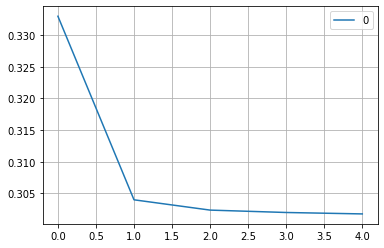

In [4]:
# plot the average loss (x = # of epoch, y = avg loss)
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True).get_figure()

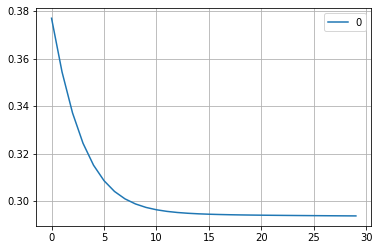

In [5]:
# tuning the model
l_rate = 0.01
epochs = 30

# evaluate the model
train_model(data, weights, bias, l_rate, epochs)

In [ ]:
# save the average loss as pdf file
df_plot.savefig("Training_Loss.pdf")